# Introduction to grayscale images
> A short introduction to grayscale images and how they are encoded on the computer. 

- date: "2020-09-02"
- comments: true
- tags: remote-sensing,beginner,grayscale,images
- category: remote-sensing-introduction


Before we can dive into multi-spectral satellite images, I think a quick refresher on how images
are encoded and represented in memory is a good starting point.

## Binary encoding

Let's take a short recap of how classical computer vision images are encoded in memory.
Internally a computer (ignoring quantum-computing) only works with binary numbers. A binary number is either a 0 or a 1, on or off.
The value of such a binary number is called a *bit*.
The smallest data-element is called a *byte*. A byte consists of 8 bits.
There are different ways how we could use these 8 bits/1 byte to encode our data.
The data we are trying to store/load defines how we interpret the data. 
If we want to only work with positive integers, we use an unsigned integer type.
An unsigned integer with 8 bits can encode all numbers from 0$-$255.
If all bits are 1, also called *set*, the value is 255.
If all bits are 0 the corresponding value is 0.{% fn 1 %}

## Grayscale images
Images, like everything in a computer, are also only encoded in binary values.
The most straightforward images are grayscale images. The possible colors of each pixel of a grayscale image can only range from black to gray to white, with all different gray shades in-between. 
*Pixels* are the basic elements of a picture. The word itself, [pixel](https://en.wikipedia.org/wiki/Pixel#Etymology), is a combination of the words picture and element/cell. So an image consists of pixels, similar to how a brick wall consists of bricks.

<figure>
    <div style="display: flex; flex-wrap: wrap; justify-content: center">
        <div>
            <figure>
<img src="/images/2020-09-02/brick.jpg" alt="Brick">
            <figcaption><center>Pixel</center></figcaption>
            </figure>
        </div>
        <div>
            <figure>
<img src="/images/2020-09-02/brick-wall.jpg" alt="Brick Wall">
            <figcaption><center>Complete Image</center></figcaption>
            </figure>
        </div>
    </div>
    <figcaption><center>My weird analogy</center></figcaption>
</figure>

We can understand how simple 8-bit grayscale images are encoded with the knowledge of our previous simple encoding scheme.
The prefix 8-bit (usually) refers to the [*color-depth*](https://en.wikipedia.org/wiki/Color_depth). It indicates how many bits are used per channel.
We only have a single channel for a grayscale image, the
colors range from black to white. (We will take a closer look at different channels in the next post.)
For now, we note that our grayscale channel is encoded with 8-bits. Or, put differently, we use 8-bits for every pixel to show different shades of gray. With 8-bits, we can color each pixel in 256 (2⁸) different ways.

With the [numpy](https://numpy.org/) and [PIL](https://pillow.readthedocs.io/) library,
we can easily create our own 8-bit grayscale image by merely changing the value of a byte. 

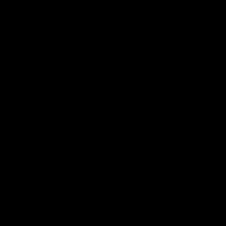

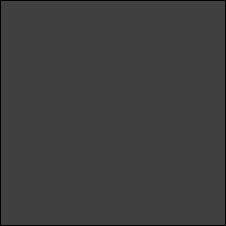

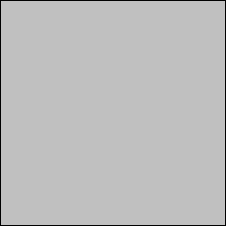

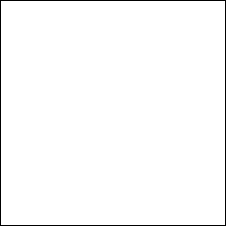

In [2]:
# collapse_hide
import numpy as np
from PIL import Image, ImageOps

def to_grayscale_image(x):
    grayscale_8_bit_mode = "L"
    return Image.fromarray(x, mode=grayscale_8_bit_mode)

def upscale_image(img, img_width=224, img_height=224):
    return img.resize((img_width, img_height), resample=Image.NEAREST)

# PIL requires np arrays as input
# Datatype is uint8, our unsigned int consisting of 8-bits
# zero is our single byte/value with value 0
# -> Array has a width and height of 1
zero = np.zeros((1, 1), dtype=np.uint8)

img_values = {
    "pixel_0": zero, 
    "pixel_64": zero + 64, 
    "pixel_192": zero + 192, 
    "pixel_255": zero + 255
}

for name, value in img_values.items():
    img = to_grayscale_image(value)
    img = upscale_image(img)
    bordered_img = ImageOps.expand(img, border=1, fill="black")
    display(bordered_img) # To display in jupyter
    # bordered_img.save(f"2020-09-02/{name}.png")


Until now, we did not care about the [resolution](https://en.wikipedia.org/wiki/Image_resolution#Pixel_resolution) of our images. 
The resolution defines how many pixels we use to visualize the object. A resolution of 1 corresponds to a single pixel.
But, with a single-pixel picture, we cannot retain a lot of information. As shown above, we could only create a single shade of gray.
Let's increase our resolution for the following images to a size of 224 pixels x 224 pixels. With more pixels, we can show more levels of detail.

Now we can extend our previous code to draw gradients!

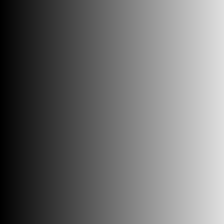

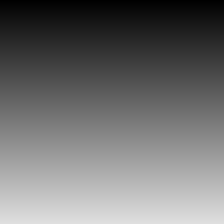

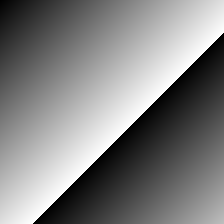

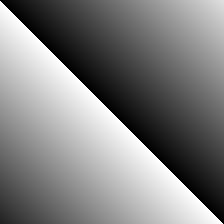

In [5]:
# collapse_input
gradients = {}
zeros = np.zeros((224, 224), dtype=np.uint8)
x_gradient = np.arange(0, 224, dtype=np.uint8).reshape(1, 224)
y_gradient = np.arange(0, 224, dtype=np.uint8).reshape(224, 1)

# Using numpy's broadcasting
gradients["x_grad_2d"] = zeros + x_gradient
gradients["y_grad_2d"] = zeros + y_gradient
gradients["sum_grad_2d"] = x_gradient + y_gradient
gradients["diff_grad_2d"] = x_gradient - y_gradient

for data in gradients.values():
	display(to_grayscale_image(data))